# Sistema de Recomendación

### Carga de Librerías (Python 3.7)

In [2]:
import pandas as pd

### Carga de conjunto de datos con calificaciones de películas

Conjunto de datos con 100,000 calificaciones de películas

In [3]:
ratings_data = pd.read_csv(r"ratings.csv")  
ratings_data.head()  

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Carga de archivo con nombres de las películas

In [4]:
movie_names = pd.read_csv(r"movies.csv")  
movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Unión de base de calificaciones con nombres de películas

In [5]:
movie_data = pd.merge(ratings_data, movie_names, on='movieId')  
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


#### Cálculo de la calificación promedio por película

In [6]:
movie_data.groupby('title')['rating'].mean().head()  

# Ordenando en forma descendente
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()  

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

#### Conteo de calificaciones por película

In [7]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()  

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

#### Generación de conjunto de datos con calificación promedio y número de calificaciones

In [8]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())  

ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())  

ratings_mean_count.head()  

,rating,rating_counts
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


#### Gráfico Número de calificaciones por película

In [9]:
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style('dark')  

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_counts'].hist(bins=50)  

#### Histograma de las calificaciones promedio

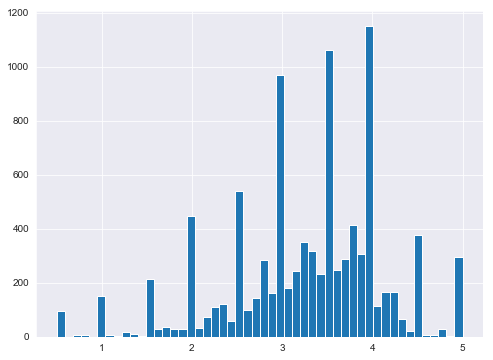

In [10]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating'].hist(bins=50) 

#### Gráfico Calificación vs Número de Calificaciones

C:\Users\IkerOlivo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x432 with 0 Axes>

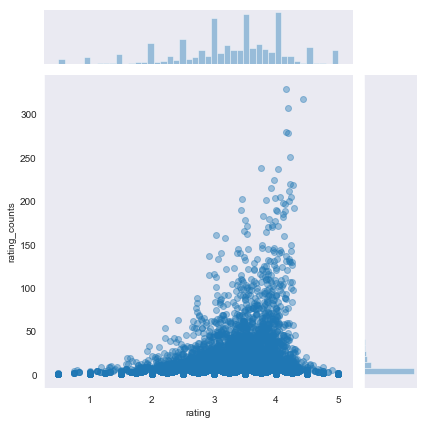

In [11]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)  

#### Creación de matriz de Usuarios y Películas

In [12]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')  
user_movie_rating.head()  

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ejemplo Toy Story (1995)

#### Calificación por Usuario para Toy Story (1995)

In [13]:
toy_story_ratings = user_movie_rating['Toy Story (1995)']  
toy_story_ratings.head()  

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    4.0
Name: Toy Story (1995), dtype: float64

#### Correlación entre las calificaciones dadas por usuarios a Toy Story y todas las demás películas

In [14]:
movies_like_toy_story = user_movie_rating.corrwith(toy_story_ratings)

corr_toy_story = pd.DataFrame(movies_like_toy_story, columns=['Correlation'])  
corr_toy_story.dropna(inplace=True)  
corr_toy_story.head()  

C:\Users\IkerOlivo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\IkerOlivo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",0.240563
(500) Days of Summer (2009),0.353833
*batteries not included (1987),-0.427425
10 Cent Pistol (2015),1.000000
10 Cloverfield Lane (2016),-0.285732


#### El resultado anterior se ordena en forma descendente

In [15]:
corr_toy_story.sort_values('Correlation', ascending=False).head(10)  

,Correlation
title,
Land Before Time III: The Time of the Great Giving (1995),1.0
Faster Pussycat! Kill! Kill! (1965),1.0
Amen. (2002),1.0
"Machine Girl, The (Kataude mashin gâru) (2008)",1.0
Waydowntown (2000),1.0
Brigadoon (1954),1.0
Project X (1987),1.0
Imitation of Life (1959),1.0
Terminal Velocity (1994),1.0


#### Consideramos sólo aquellas películas con más de 50 calificaciones

In [16]:
corr_toy_story = corr_toy_story.join(ratings_mean_count['rating_counts'])  
corr_toy_story.head()  

corr_toy_story[corr_toy_story ['rating_counts']>50].sort_values('Correlation', ascending=False).head()  

,Correlation,rating_counts
title,,
Toy Story (1995),1.000000,215
Toy Story 2 (1999),0.699211,97
Arachnophobia (1990),0.652424,53
"Incredibles, The (2004)",0.643301,125
Finding Nemo (2003),0.618701,141


Se obtienen mejores resultados